<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/detector_patente_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Plate Recognition in Images using Unet as Neural Network model

In [1]:
# IMPORTS
# usefulls urls:
# dataset and dataloader of pytorch: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# neural network of pytorch: https://pytorch.org/docs/stable/nn.html
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from google.colab import drive
from torchvision import transforms as T

In [2]:
# mount the drive files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# FILE PATHS

# specific path of the folder that contain the train data
PATH_DATA = '/content/drive/MyDrive/facu/dataset/images'
# specific path of the folder that contain the train masks
PATH_MASK = '/content/drive/MyDrive/facu/dataset/masks'

In [4]:
# CONSTANTS

# the number of images
DATASET_SIZE = 3977
# size for the batches
BATCH_SIZE = 32
# the size of the train that we will use for training, the rest of the train dataset will be use for monitoring
TRAIN_SIZE = int(0.80*DATASET_SIZE)
# the size of the test files
TEST_SIZE = DATASET_SIZE - TRAIN_SIZE
# the size of the validation o monitoring files
VALID_SIZE = int(0.1*TRAIN_SIZE)

In [43]:
# DATASET

# custom class of dataset, this will load all the files of the data_path and mask_path
class Plates_Dataset(Dataset):

  def __init__(self,data_path,mask_path,transform):
    self.data_path = data_path
    self.mask_path = mask_path
    self.transform = transform

    self.images = sorted(os.listdir(self.data_path))
    self.masks = sorted(os.listdir(self.mask_path))

  def __len__(self):
    return len(self.masks)

  def __getitem__(self, idx):
    img_path = os.path.join(self.data_path, self.images[idx])
    image = Image.open(img_path)
    mask_path = os.path.join(self.mask_path, self.masks[idx])
    mask = Image.open(mask_path)
    if self.transform is not None:
      image = self.transform(image)
      mask = self.transform(mask)
      mask_max = mask.max().item()
      mask /= mask_max

    return image, mask

In [44]:
# transforms

transform_data = T.Compose([T.Resize([224, 224]),T.ToTensor()] )
# transform = T.ToTensor()

In [45]:
# call the plates_dataset class and upload all the fiels
full_dataset = Plates_Dataset(PATH_DATA,PATH_MASK,transform=transform_data)

In [46]:
# split the complete train_dataset in two tensors:
# one t_dataset only for train
# the second test_dataset for testing

t_dataset, test_dataset = random_split(full_dataset, [TRAIN_SIZE, TEST_SIZE])

In [47]:
# t_dataset split it self as train and validation
train_dataset, valid_dataset = random_split(t_dataset, [TRAIN_SIZE-VALID_SIZE, VALID_SIZE])

In [39]:
print('Length of train dataset: ',len(train_dataset))
print('Length of validation dataset: ',len(valid_dataset))
print('Length of test dataset: ',len(test_dataset))
print('Total of files in the dataset: ',len(full_dataset))

Length of train dataset:  2863
Length of validation dataset:  318
Length of test dataset:  796
Total of files in the dataset:  3977


In [48]:
# DATALOADER

# Preparing your data for training with DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
monitor_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [49]:
# PLOT THE BATCH

# this function plot the images and their masks
def plot_batch(batch_size,imgs,masks):
  plt.figure(figsize=(20,10))
  for i in range(batch_size):
    plt.subplot(4, 8, i+1)
    img = imgs[i,...].permute(1,2,0).numpy()
    mask = masks[i, ...].permute(1,2,0).numpy()
    plt.imshow(img)
    plt.imshow(mask, alpha=0.5)

    plt.axis('Off')
  plt.tight_layout()
  plt.show()

torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])


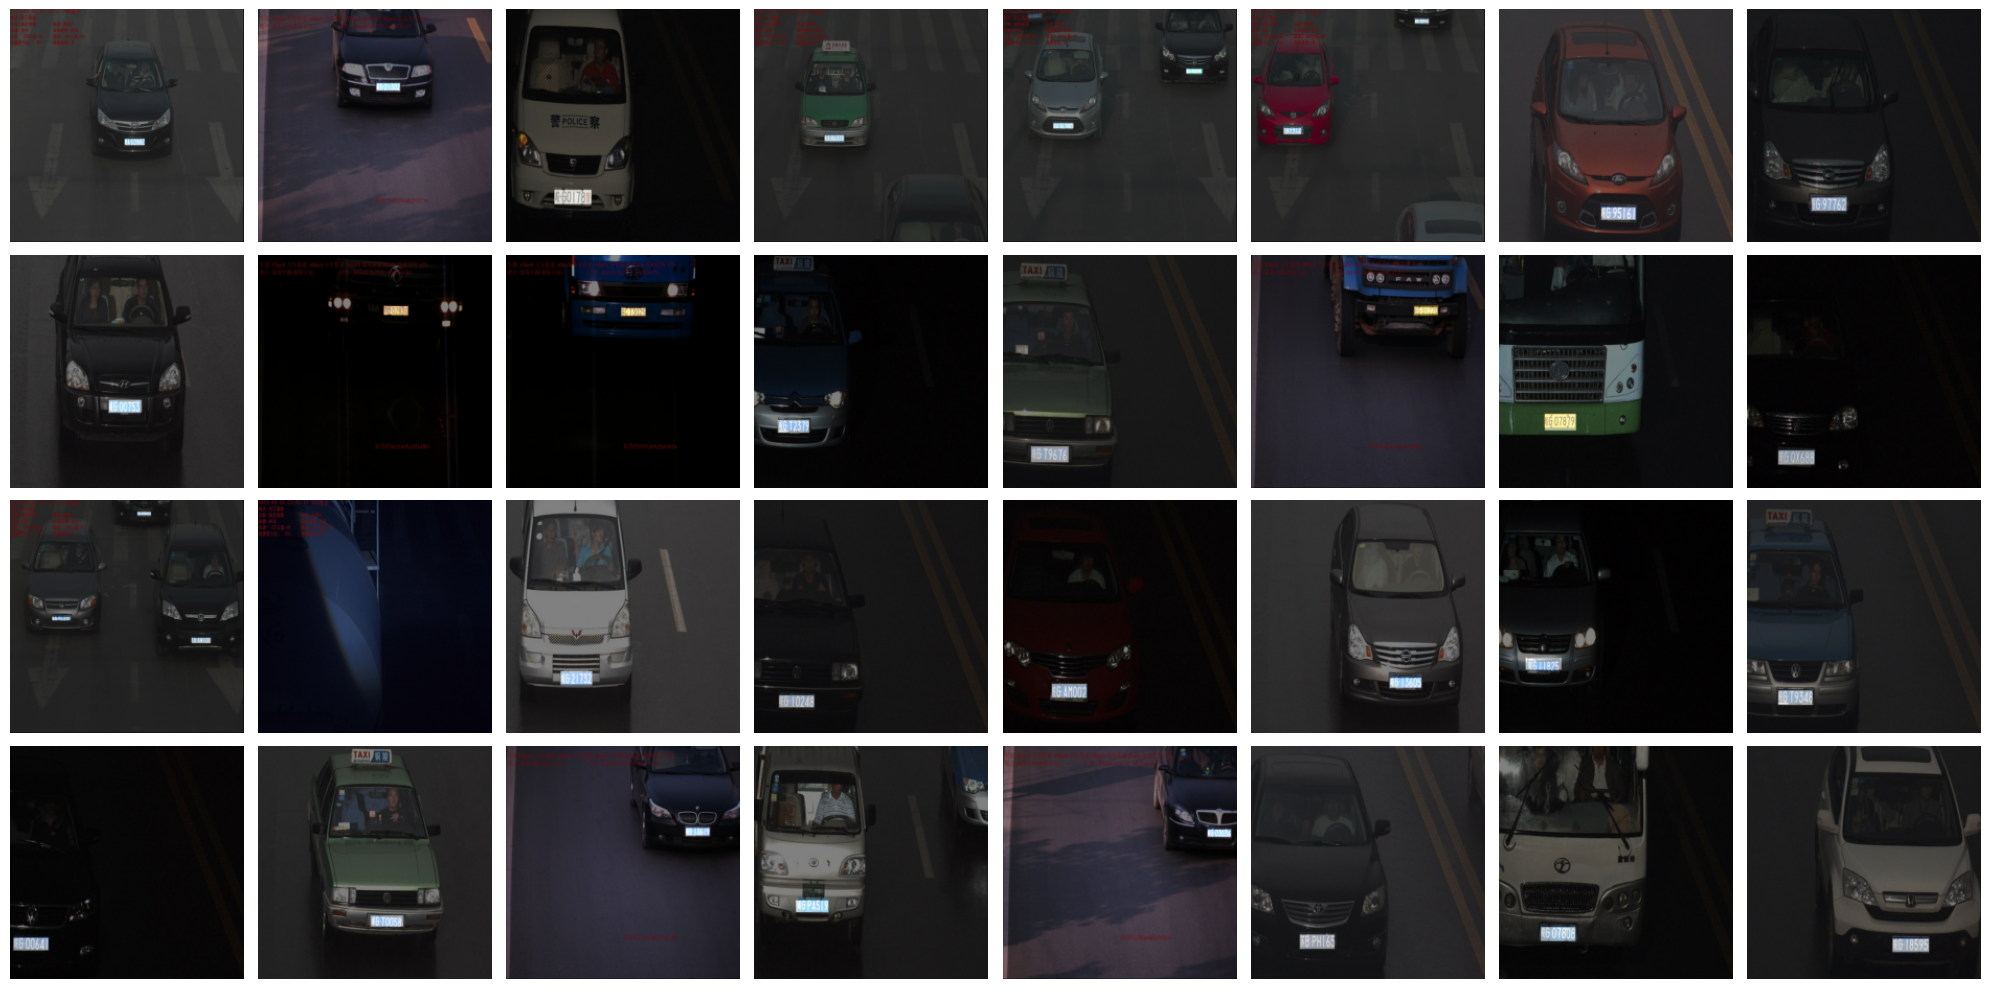

In [50]:
imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)
plot_batch(BATCH_SIZE,imgs, masks)

In [ ]:
# UNET MODEL

# class that implement the architecture of the convolution network of Unet
class Unet():
  def __init__(self):
    return 0

In [ ]:
# TRAIN

In [ ]:
# TEST